In [2]:
#importing library
import pandas as pd
import numpy as np

In [4]:
#reading the csv file
data=pd.read_csv('data/insurance.csv')

In [5]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Visualisation

<AxesSubplot:>

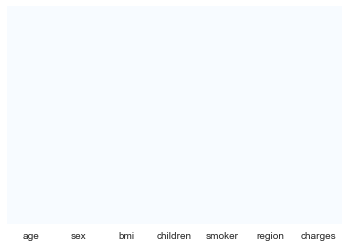

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Blues')

**No Null value**

<AxesSubplot:xlabel='age', ylabel='count'>

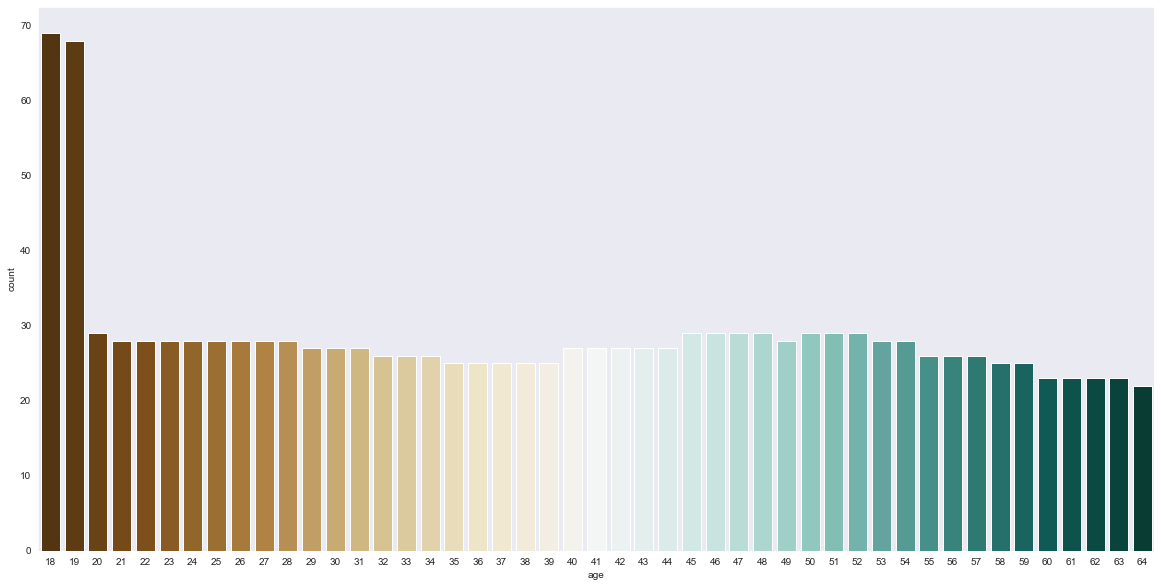

In [16]:
plt.figure(figsize=(20,10))
sns.set_style('dark')
sns.countplot(x='age',data=data,palette='BrBG')

**We can see young age people are likely to have inurance** 
<br>
**Let's see the relation between age and charge*

<AxesSubplot:>

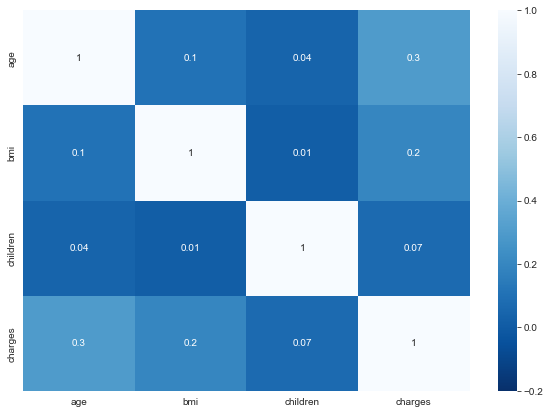

In [32]:
pearson =data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = pearson, vmin=-0.2, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

**From the heat map, we can see that charges and smoker (0.8) are highly correlated and then charges has correlation with age (0.3) and bmi (0.2). Negative value shows no correlation of region with charges. Other features have shown some correlation with charges but in a vary small amount.**

<AxesSubplot:title={'center':'Distribution of age and smoker'}, xlabel='age', ylabel='count'>

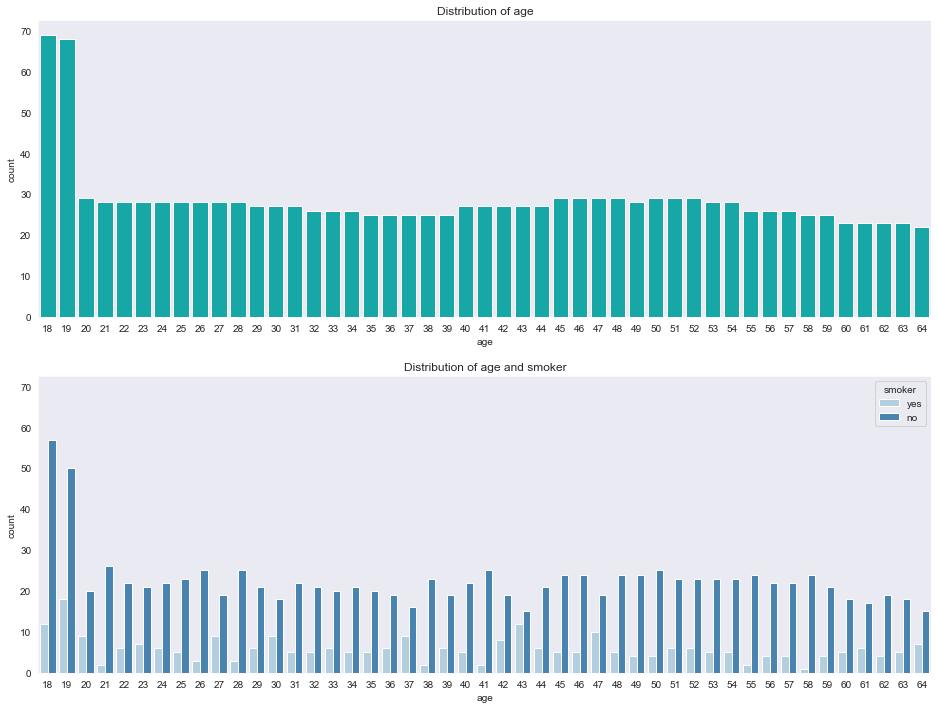

In [26]:
sfig, ax=plt.subplots(2,1, sharey=True, figsize=(16,12))
ax[0].set_title('Distribution of age')
sns.countplot(x='age', data=data, color='c', ax=ax[0])
ax[1].set_title('Distribution of age and smoker')
sns.countplot(x='age',hue='smoker', data=data, palette='Blues',ax=ax[1])

**From the heat map, we can see that charges and smoker (0.8) are highly correlated and then charges has correlation with age (0.3) and bmi (0.2). Negative value shows no correlation of region with charges. Other features have shown some correlation with charges but in a vary small amount.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points

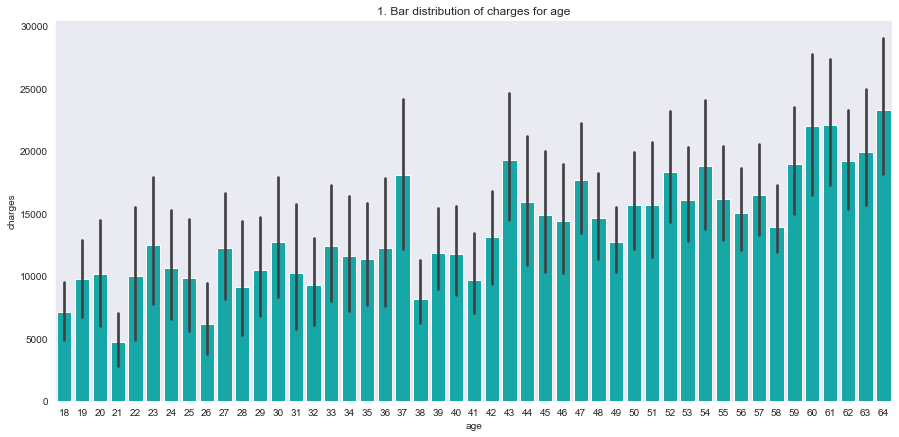

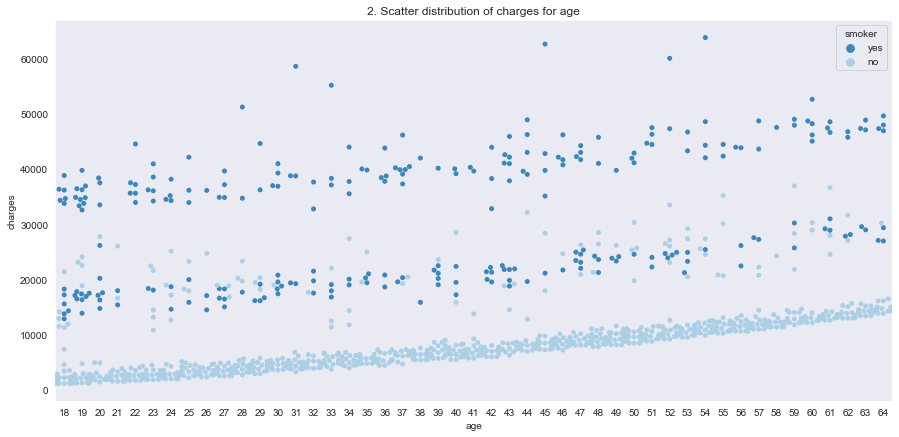

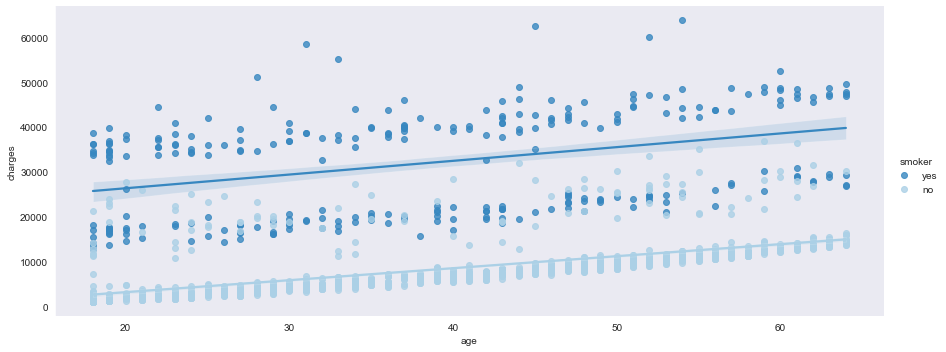

In [29]:
fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title('1. Bar distribution of charges for age')
sns.barplot(x='age',y='charges',data=data, color='c', ax=ax)
fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title('2. Scatter distribution of charges for age')
sns.swarmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=data, ax=ax)
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=data, aspect=2.5)

**With increasing age, charges increases. we can relate this data with real situation as we know that with incrasing age, the following problems come out-**

- our immunity to prevent disease decreases. so different diseases attacks.
- aging changes our tissues, organs as they slowly lose function.
For these reasons, with increasing age, people easily and more frequently beacome ill and different disease occurs at the same time which increase their charges.

**From the scatter plot (2), we can see that , lower limit and upper limit of charges increases with the incresing age. we can vaugely see three different range of charges increasing on this plot with age starting from 2000 , 15000 and 35000 charges.We can assume them low-cost, meduim-cost and high-cost disease. With increasing age, severity of these diseases increase. As a result, their charges increase proportionaly. Most non-smokers have low-cost disease with some outliers found in medium-cost charges. but smokers requires medieum to higher charges.**

**In the plot (3), two regression lines for smokers and non-smokers are ploted, which are straight positively increament line**

<AxesSubplot:xlabel='region', ylabel='count'>

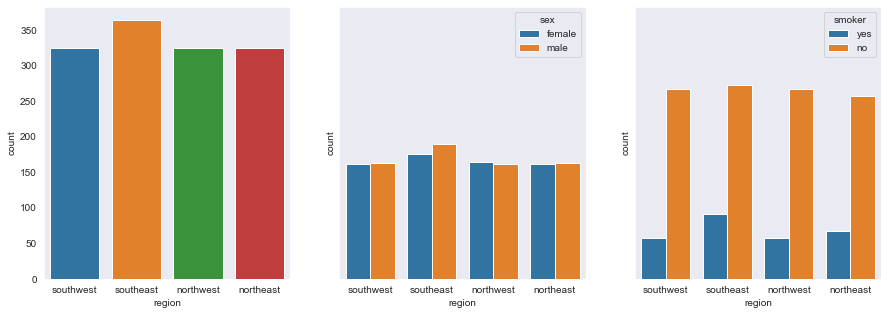

In [36]:
ig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))
sns.countplot(x='region', data=data, ax=ax[0])
sns.countplot(x='region',hue='sex', data=data, ax=ax[1])
sns.countplot(x='region',hue='smoker', data=data, ax=ax[2])

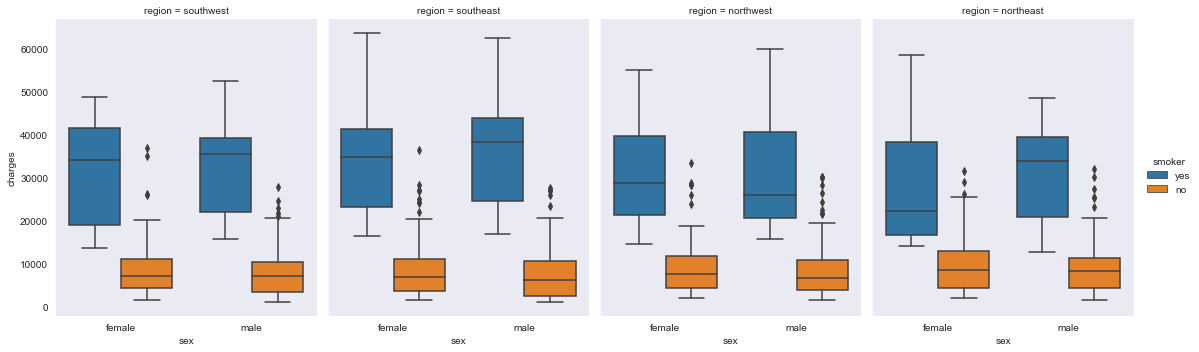

In [38]:
sns.catplot(x='sex',y='charges',hue='smoker',col='region',col_wrap=4, kind='box', data=data, aspect=0.8)

No. of patients from Southeast region is highest among other region. So male and female patients of this region is hgher than other region. So, the charges for the smoker patients are higher than other region's patients, where non-smokers charges data for this region are comparable to other regions data. Actually, from correleation methods, we have concluded that region and charges are negatively correlated.

# Apply polynomial regression to predict & test

In [72]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

#one hot encoding
data_encoded = pd.get_dummies(data, columns=['sex','region','smoker'])
#features and target selection
feature = data_encoded.drop(['charges'], axis = 1)
target = data_encoded.charges

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    random_state=42)

In [74]:
data_encoded

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,1,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0,1,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1,1,0


In [75]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [68]:
# Convert DataFrame to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape the data for polynomial regression
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [89]:
# Create the polynomial features
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the model using linear regression with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the testing set
y_pred = poly_model.predict(X_test_poly)

# Evaluate the model's accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23498217.998921495
R-squared: 0.8486414814914823
